In [1]:
library(fpp2)
library(ggplot2)

Warning message:
"package 'fpp2' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
-- Attaching packages ---------------------------------------------- fpp2 2.4 --
v ggplot2   3.3.3     v fma       2.4  
v forecast  8.13      v expsmooth 2.3  
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Warning message:
"package 'fma' was built under R version 3.6.3"Warning message:
"package 'expsmooth' was built under R version 3.6.3"


# 1. Daily electricity demand for Victoria, Australia, during 2014 is contained in elecdaily.

## a. Plot the data and the regression model for Demand with temperature as an explanatory variable. Why is there a positive relationship?

In [2]:
daily20 <- head(elecdaily,20)
daily20

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Demand,WorkDay,Temperature
1.428571,174.8963,0,26.0
1.571429,188.5909,1,23.0
1.714286,188.9169,1,22.2
1.857143,173.8142,0,20.3
2.000000,169.5152,0,26.1
2.142857,195.7288,1,19.6
2.285714,199.9029,1,20.0
2.428571,205.3375,1,27.4
2.571429,228.0782,1,32.4
2.714286,258.5984,1,34.0


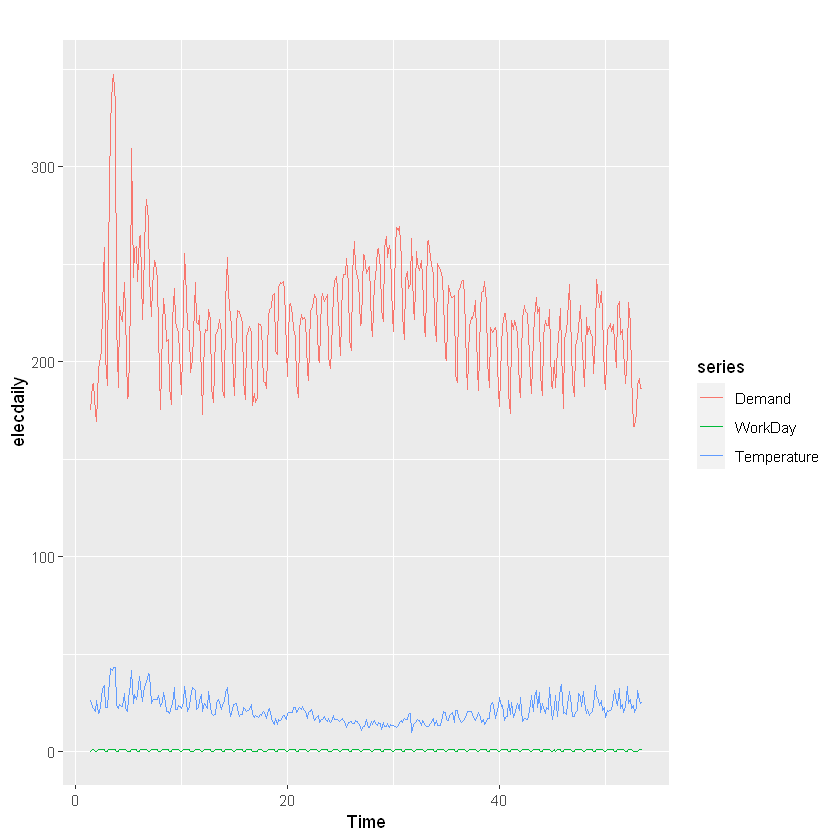

In [3]:
autoplot(elecdaily)

In [4]:
fit <- lm(formula=Demand~Temperature, data=daily20)

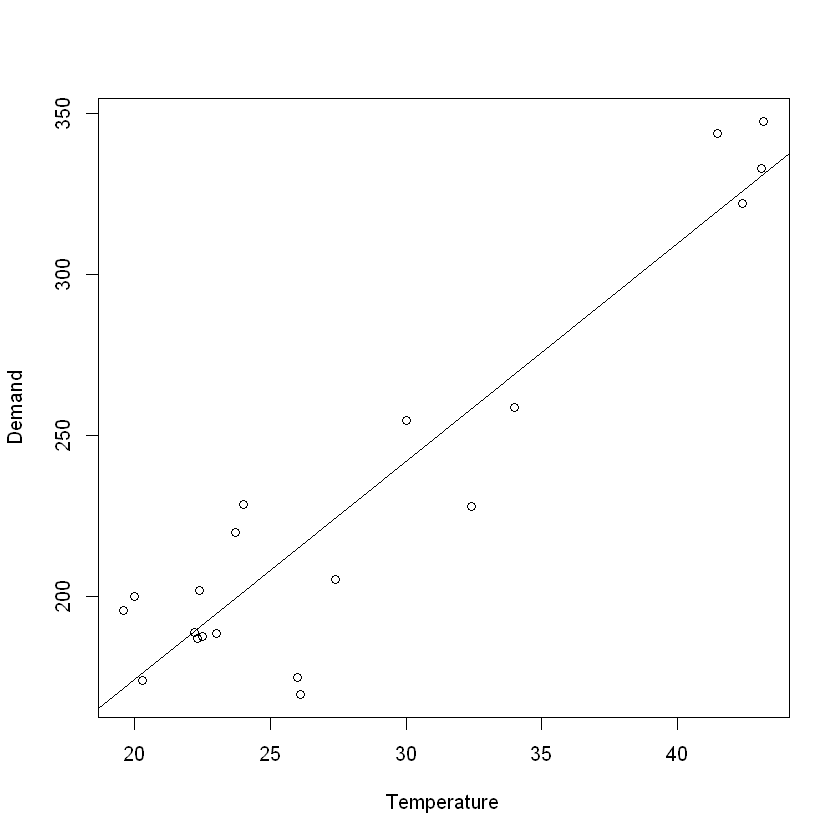

In [5]:
plot(Demand~Temperature, data=daily20)
abline(fit)

In [6]:
fit1 <- lm(formula=Demand~Temperature, data=elecdaily)

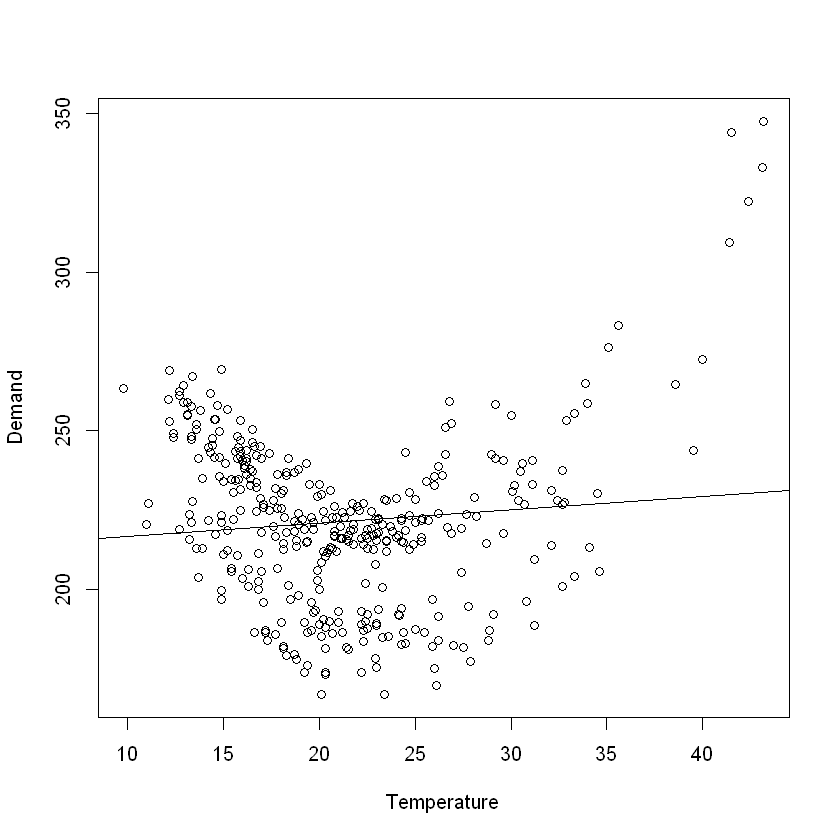

In [7]:
plot(Demand~Temperature, data=elecdaily)
abline(fit1)

## b. Produce a residual plot. Is the model adequate? Are there any outliers or influential observations?


	Breusch-Godfrey test for serial correlation of order up to 5

data:  Residuals
LM test = 3.8079, df = 5, p-value = 0.5774


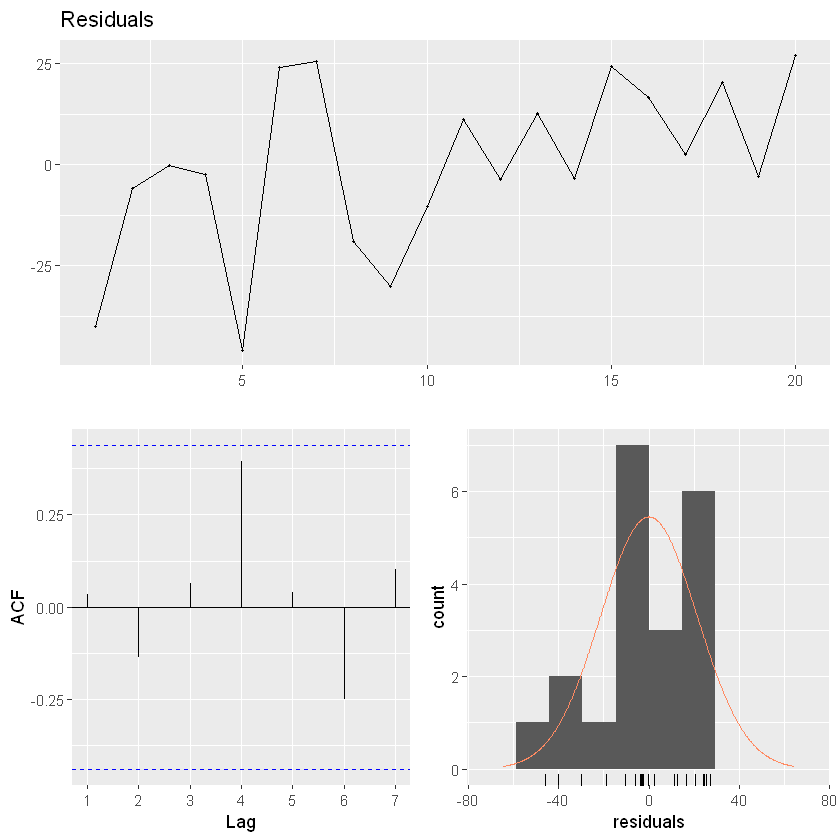

In [8]:
checkresiduals(fit)


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals
LM test = 259.05, df = 10, p-value < 2.2e-16


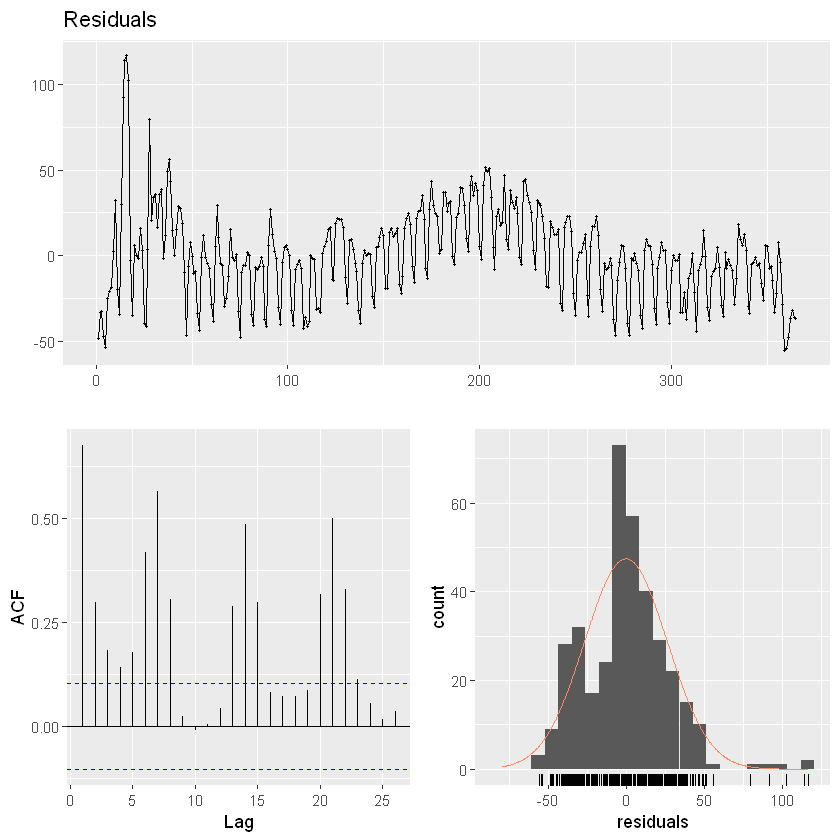

In [9]:
checkresiduals(fit1)

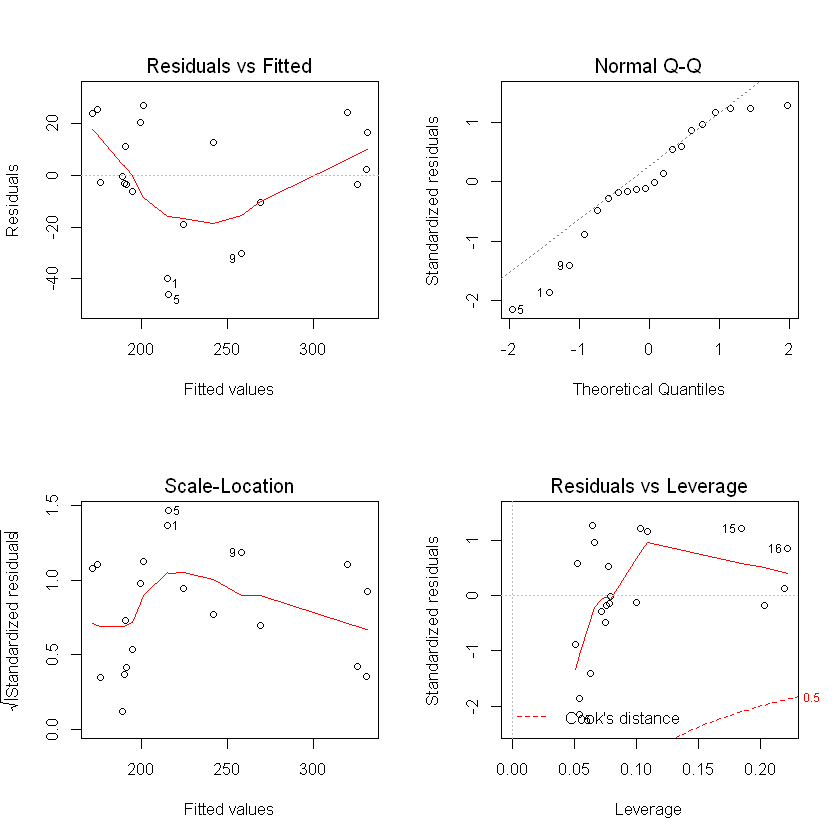

In [10]:
par(mfrow=c(2,2))
plot(fit)

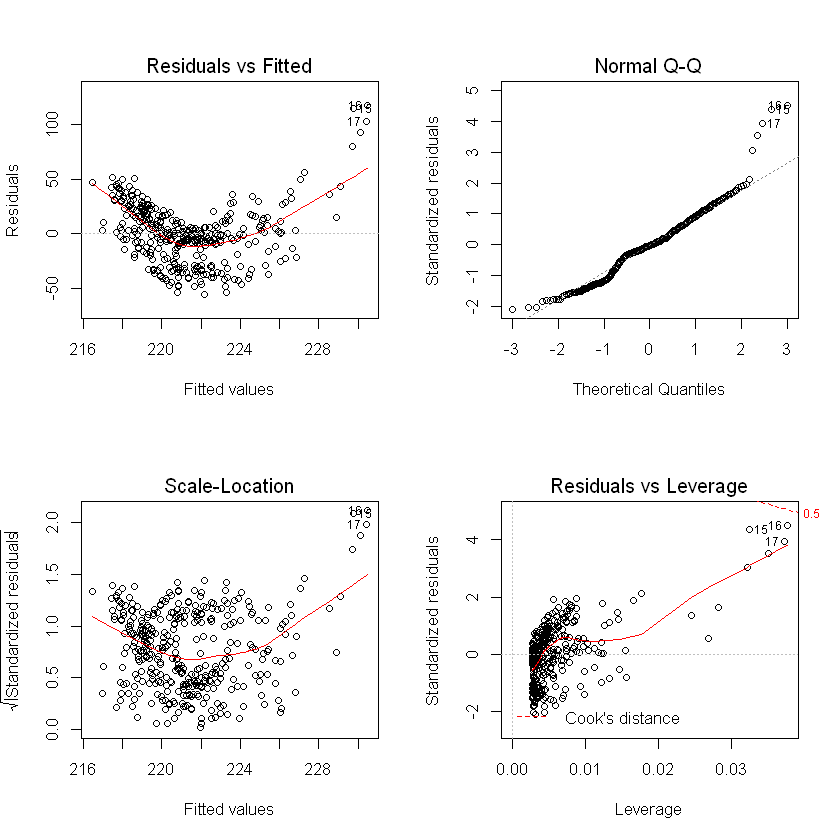

In [11]:
par(mfrow=c(2,2))
plot(fit1)

## 1.C Use the model to forecast the electricity demand that you would expect for the next day if the maximum temperature was 15 and compare it with the forecast if the with maximum temperature was 35. Do you believe these forecasts?

In [12]:
temp_range = c(15, 35)

In [13]:
forecast(fit, temp_range)

Warning message in forecast.lm(fit, temp_range):
"newdata column names not specified, defaulting to first variable required."

  Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
1       140.5701 108.6810 172.4591  90.21166 190.9285
2       275.7146 245.2278 306.2014 227.57056 323.8586

In [14]:
forecast(fit1, temp_range)

Warning message in forecast.lm(fit1, temp_range):
"newdata column names not specified, defaulting to first variable required."

  Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1       218.6592 184.4779 252.8406 166.3039 271.0146
2       227.0242 192.6585 261.3898 174.3866 279.6617

Warning message in forecast.lm(fit, temp_range):
"newdata column names not specified, defaulting to first variable required."

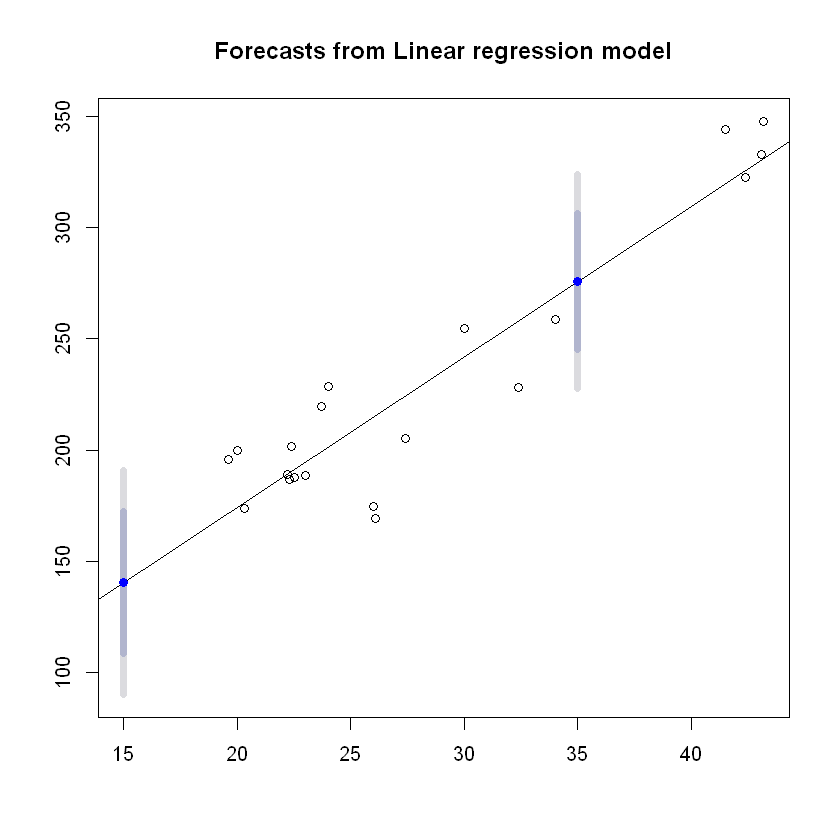

In [15]:
plot(forecast(fit, temp_range))

Warning message in forecast.lm(fit1, temp_range):
"newdata column names not specified, defaulting to first variable required."

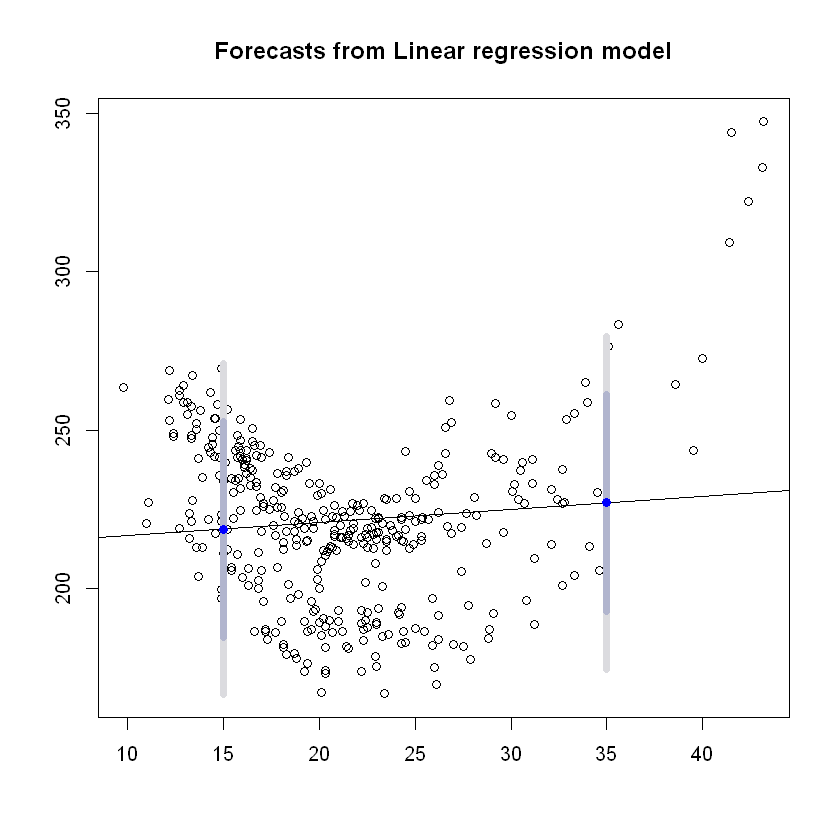

In [16]:
plot(forecast(fit1, temp_range))

# 2. Data set mens400 contains the winning times (in seconds) for the men’s 400 meters final in each Olympic Games from 1896 to 2016.

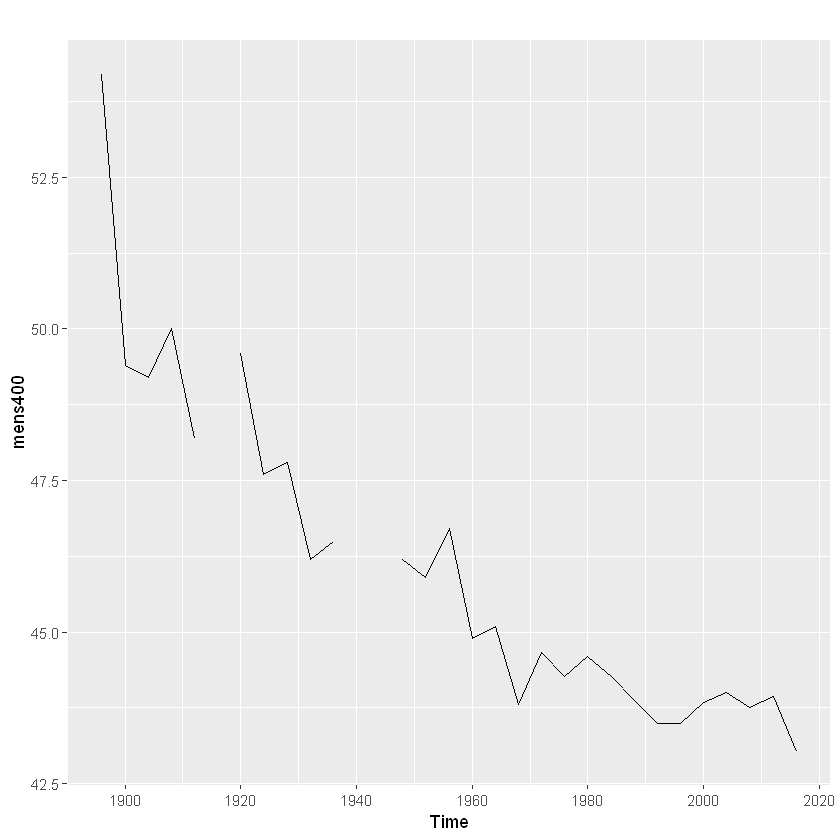

In [17]:
autoplot(mens400)

## 2.b

In [18]:
Year = time(mens400)
fit2 = lm(mens400~Year, data=mens400)

In [19]:
fit2


Call:
lm(formula = mens400 ~ Year, data = mens400)

Coefficients:
(Intercept)         Year  
  172.48148     -0.06457  


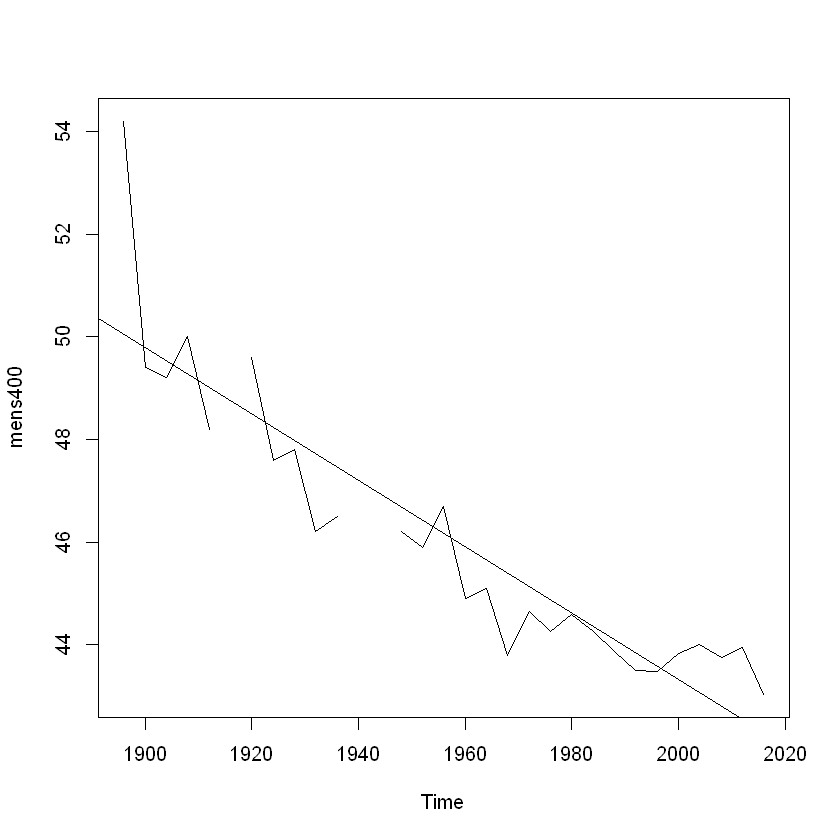

In [20]:
plot(mens400)
abline(fit2)

## 2c.


	Breusch-Godfrey test for serial correlation of order up to 6

data:  Residuals
LM test = 3.6082, df = 6, p-value = 0.7295


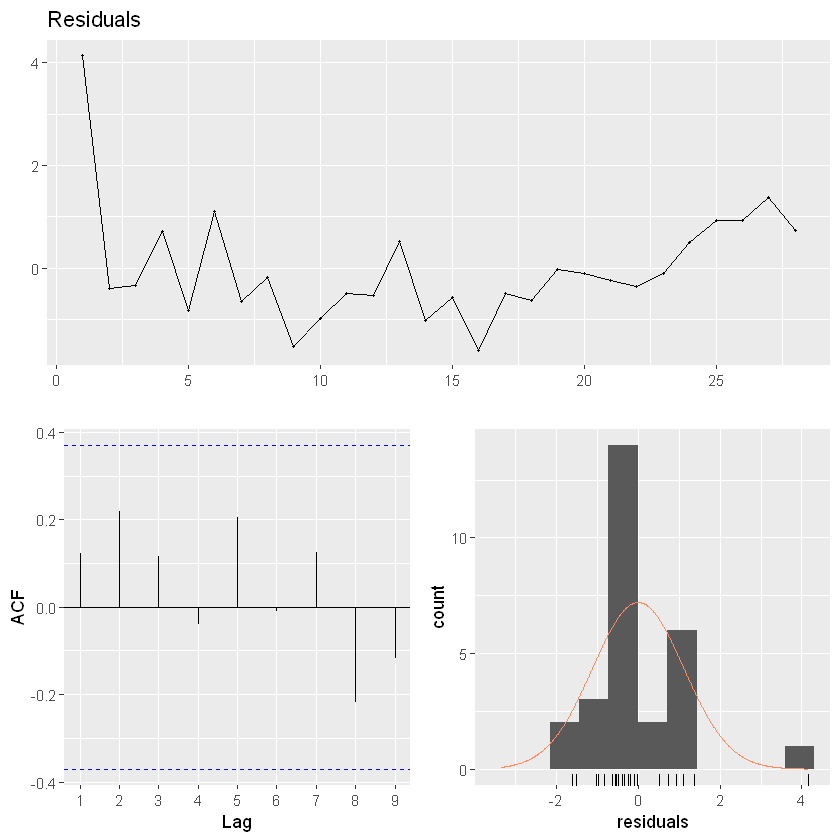

In [21]:
checkresiduals(fit2)

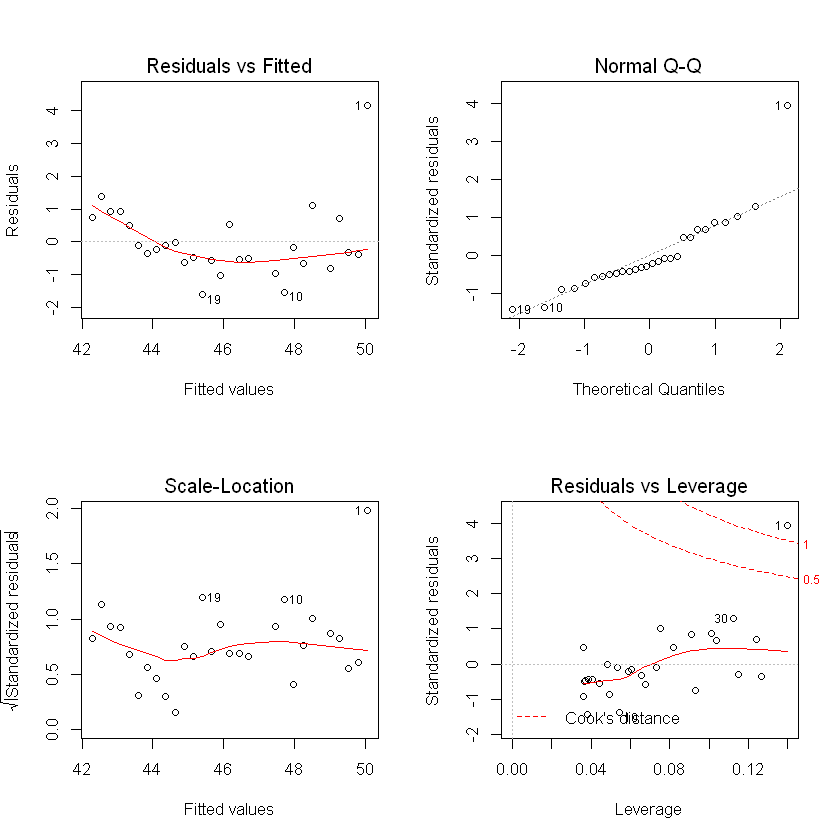

In [22]:
par(mfrow=c(2,2))
plot(fit2)

In [23]:
forecast(fit2, newdata = data.frame(Year=c(2020)))

  Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1       42.04231 40.44975 43.63487 39.55286 44.53176

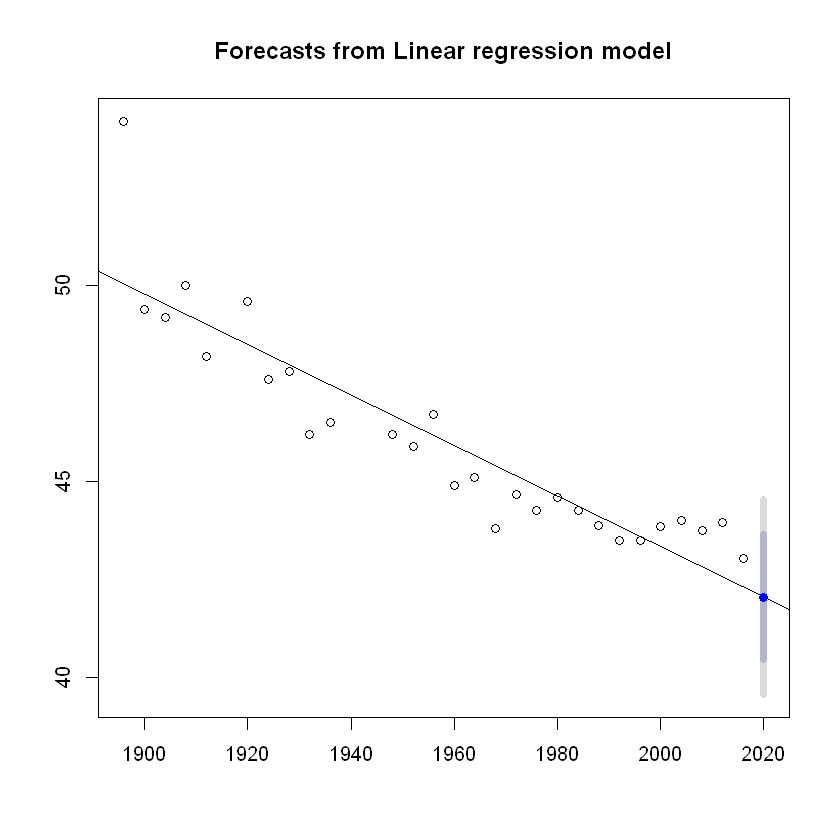

In [24]:
plot(forecast(fit2, newdata = data.frame(Year=c(2020))))

# 3.

In [25]:
easter(ausbeer)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1956,0.67,0.33,0.00,0.00
1957,0.00,1.00,0.00,0.00
1958,0.00,1.00,0.00,0.00
1959,1.00,0.00,0.00,0.00
1960,0.00,1.00,0.00,0.00
1961,0.33,0.67,0.00,0.00
1962,0.00,1.00,0.00,0.00
1963,0.00,1.00,0.00,0.00
1964,1.00,0.00,0.00,0.00
1965,0.00,1.00,0.00,0.00


In [26]:
?ausbeer

# 4.

$
log y = B_0 + B_1 log x + \varepsilon
$

$
\frac{dy}{y} = \frac{dx}{x}B_1 \ \Rightarrow B_1 = (\frac{dy}{y}) / (\frac{dx}{x})
$

# 5.

## a.

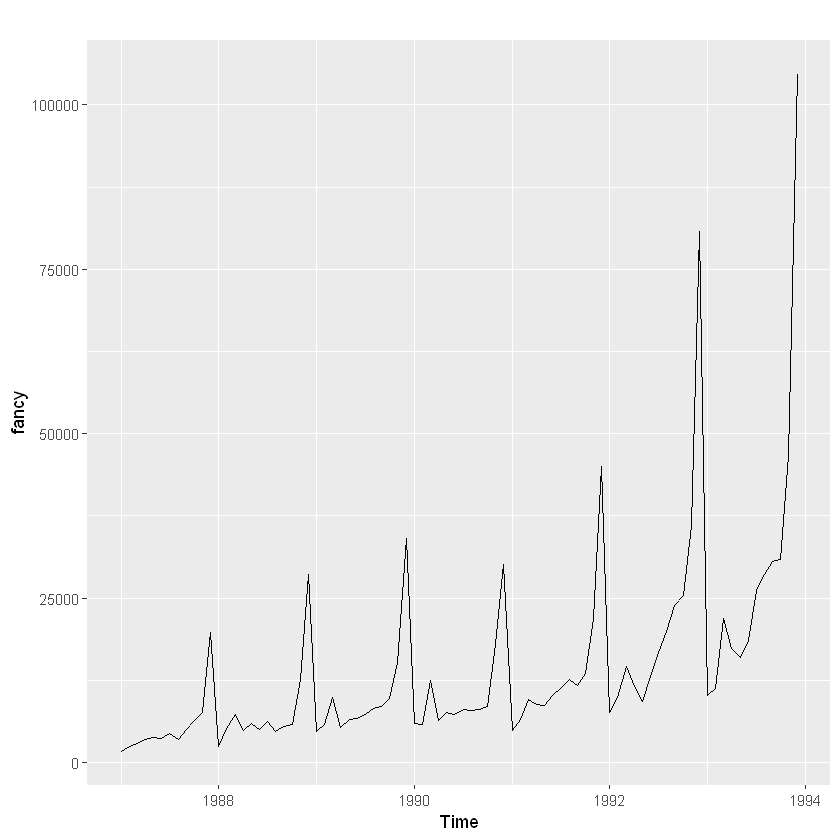

In [27]:
autoplot(fancy)

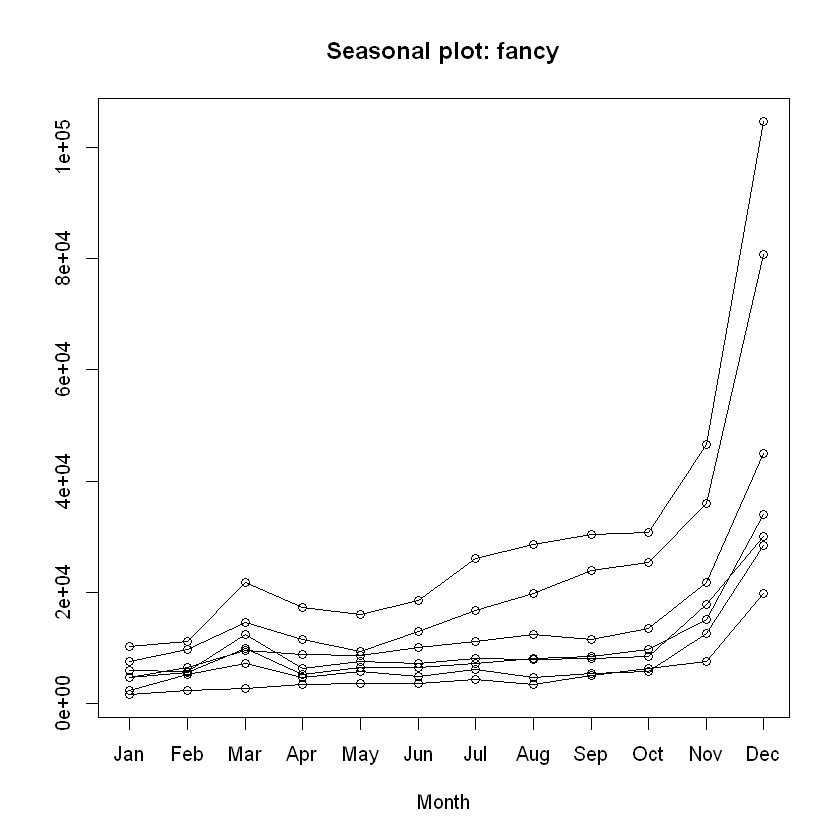

In [28]:
seasonplot(fancy)

## 5c.

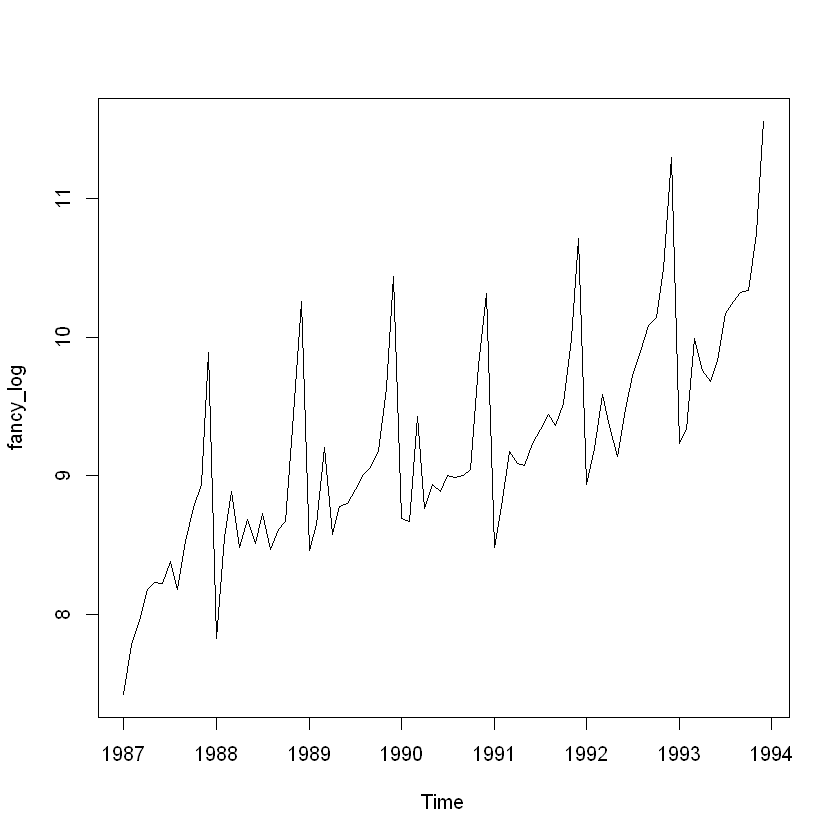

In [29]:
fancy_log <- log(fancy)
plot(fancy_log)

In [30]:
fest_dummy <- rep(0, length(fancy))
fest_dummy[seq_along(fest_dummy)%%12 == 3] <- 1
fest_dummy[3] <- 0

In [31]:
fit_fancy <- tslm(fancy_log~trend + season + fest_dummy)

In [32]:
summary(fit_fancy)


Call:
tslm(formula = fancy_log ~ trend + season + fest_dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33673 -0.12757  0.00257  0.10911  0.37671 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.6196670  0.0742471 102.626  < 2e-16 ***
trend       0.0220198  0.0008268  26.634  < 2e-16 ***
season2     0.2514168  0.0956790   2.628 0.010555 *  
season3     0.2660828  0.1934044   1.376 0.173275    
season4     0.3840535  0.0957075   4.013 0.000148 ***
season5     0.4094870  0.0957325   4.277 5.88e-05 ***
season6     0.4488283  0.0957647   4.687 1.33e-05 ***
season7     0.6104545  0.0958039   6.372 1.71e-08 ***
season8     0.5879644  0.0958503   6.134 4.53e-08 ***
season9     0.6693299  0.0959037   6.979 1.36e-09 ***
season10    0.7473919  0.0959643   7.788 4.48e-11 ***
season11    1.2067479  0.0960319  12.566  < 2e-16 ***
season12    1.9622412  0.0961066  20.417  < 2e-16 ***
fest_dummy  0.5015151  0.1964273   2.553 0.012856 *  
---
Sign

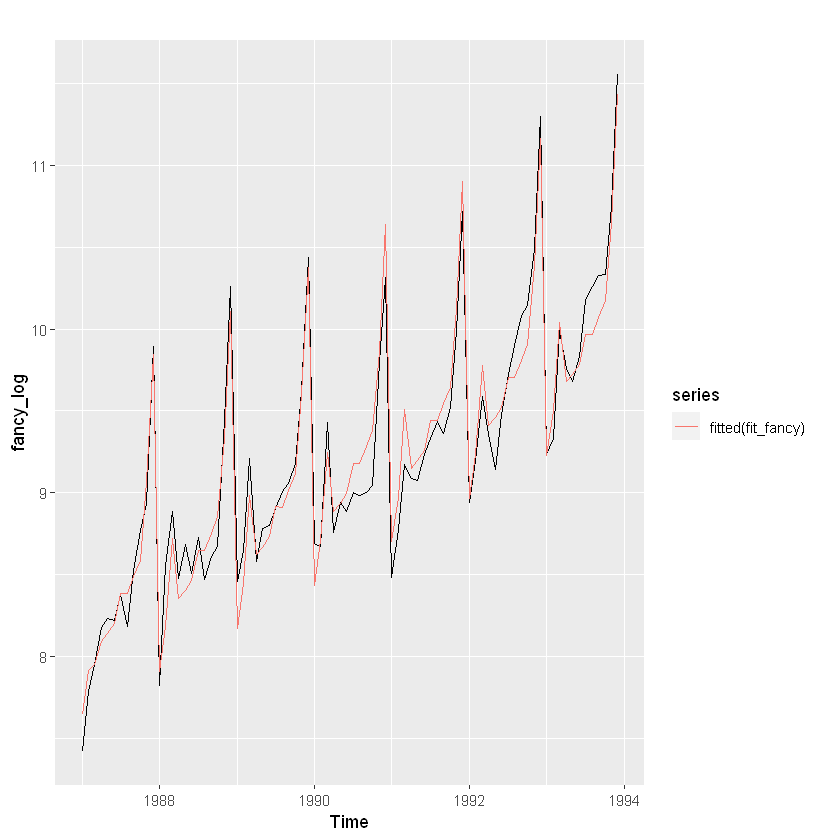

In [33]:
autoplot(fancy_log) + autolayer(fitted(fit_fancy))

## 5d.

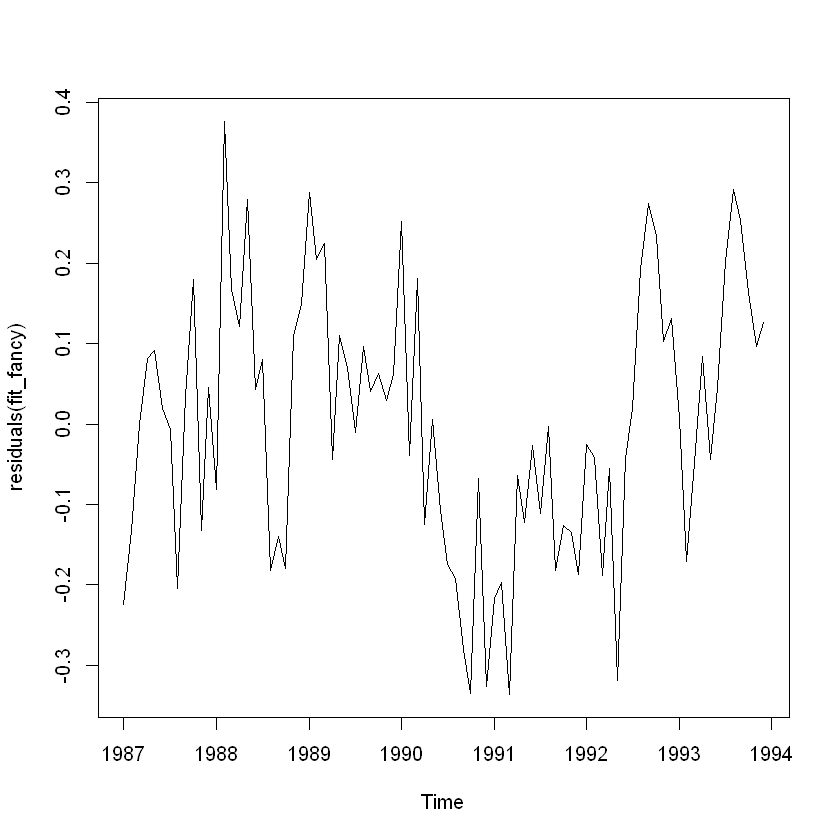

In [34]:
plot(residuals(fit_fancy))

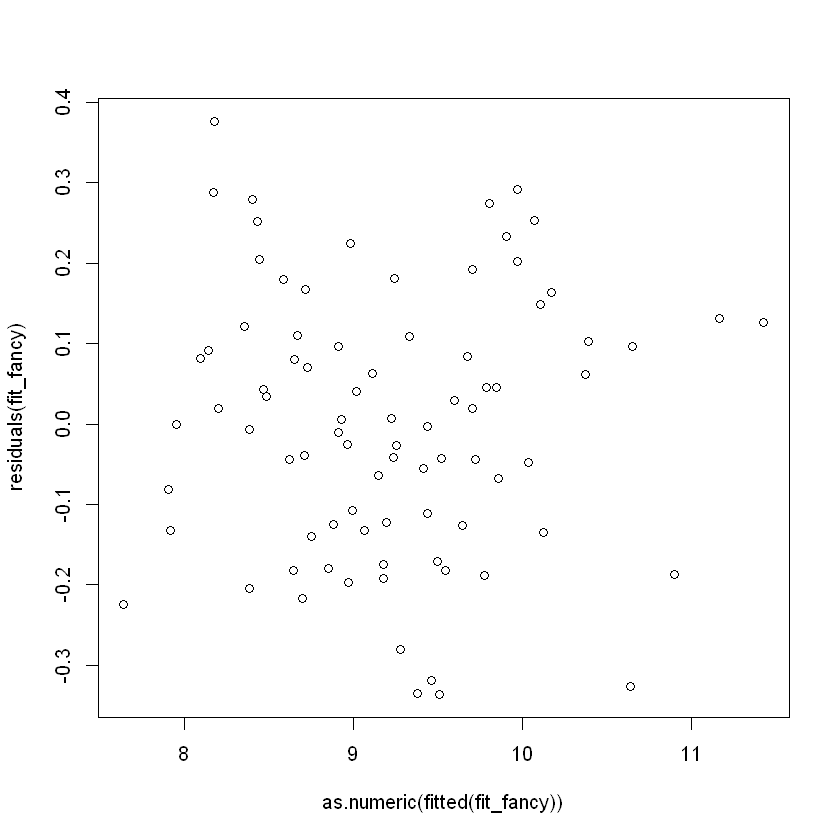

In [35]:
plot(as.numeric(fitted(fit_fancy)), residuals(fit_fancy))

## 5.e

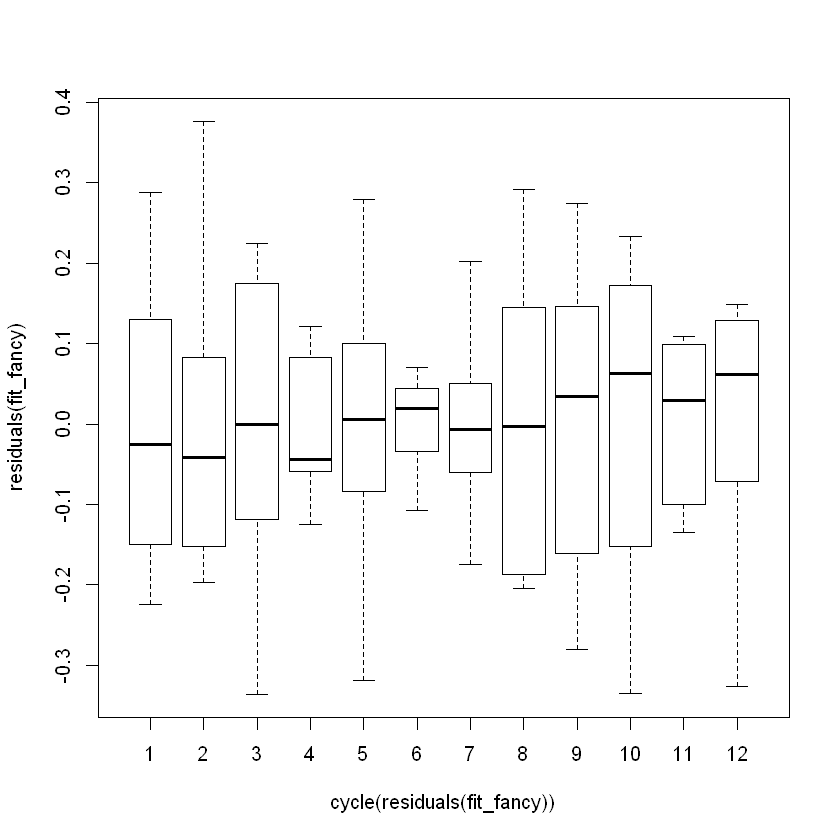

In [36]:
boxplot(residuals(fit_fancy)~cycle(residuals(fit_fancy)))

## 5.f

In [37]:
summary(fit_fancy$coef)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02202 0.39041 0.54474 1.12051 0.72788 7.61967 

In [38]:
fit_fancy$coef

(Intercept)       trend     season2     season3     season4     season5 
 7.61966701  0.02201983  0.25141682  0.26608280  0.38405351  0.40948697 
    season6     season7     season8     season9    season10    season11 
 0.44882828  0.61045453  0.58796443  0.66932985  0.74739195  1.20674790 
   season12  fest_dummy 
 1.96224123  0.50151509

## 5g.


	Breusch-Godfrey test for serial correlation of order up to 17

data:  Residuals from Linear regression model
LM test = 37.954, df = 17, p-value = 0.002494


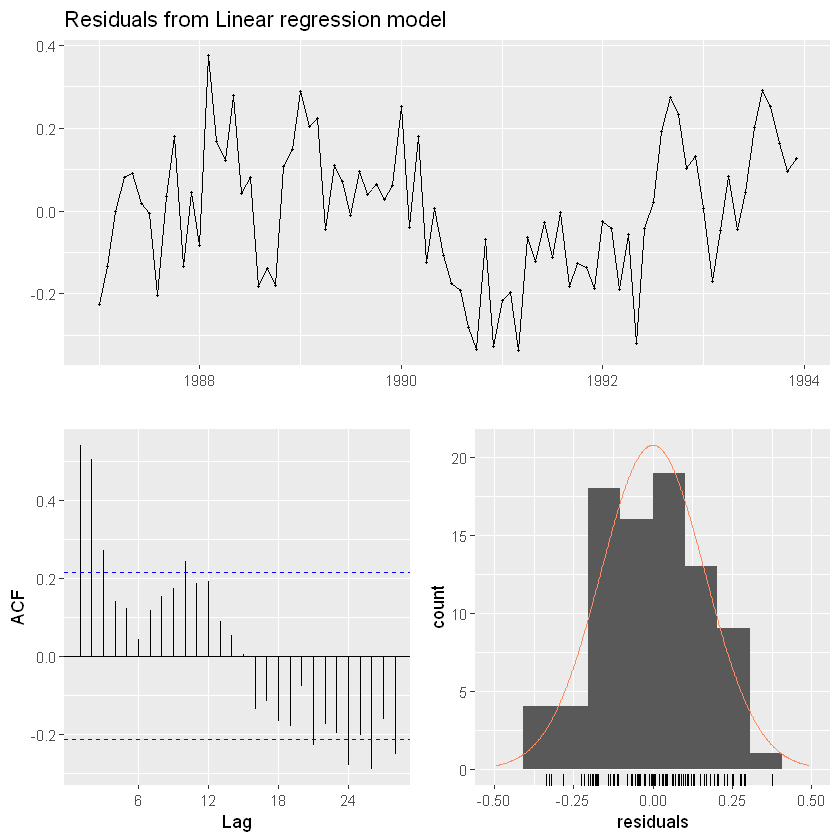

In [39]:
checkresiduals(fit_fancy)

## 5h.

In [40]:
future_fancy <- data.frame(fest_dummy = rep(0, 36))
pred <- forecast(fit_fancy, newdata=future_fancy)
pred

         Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
Jan 1994       9.491352  9.238522  9.744183  9.101594  9.88111
Feb 1994       9.764789  9.511959 10.017620  9.375031 10.15455
Mar 1994       9.801475  9.461879 10.141071  9.277961 10.32499
Apr 1994       9.941465  9.688635 10.194296  9.551707 10.33122
May 1994       9.988919  9.736088 10.241749  9.599161 10.37868
Jun 1994      10.050280  9.797449 10.303110  9.660522 10.44004
Jul 1994      10.233926  9.981095 10.486756  9.844168 10.62368
Aug 1994      10.233456  9.980625 10.486286  9.843698 10.62321
Sep 1994      10.336841 10.084010 10.589671  9.947083 10.72660
Oct 1994      10.436923 10.184092 10.689753 10.047165 10.82668
Nov 1994      10.918299 10.665468 11.171129 10.528541 11.30806
Dec 1994      11.695812 11.442981 11.948642 11.306054 12.08557
Jan 1995       9.755590  9.499844 10.011336  9.361338 10.14984
Feb 1995      10.029027  9.773281 10.284773  9.634775 10.42328
Mar 1995      10.065713  9.722498 10.408928  9.536620 1

## 5.i

In [41]:
df <- as.data.frame(pred)
df <- exp(df)

In [42]:
df

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
Jan 1994,13244.70,10285.82,17054.73,8969.583,19557.43
Feb 1994,17409.81,13520.45,22418.00,11790.284,25707.73
Mar 1994,18060.36,12860.02,25363.61,10699.594,30484.96
Apr 1994,20774.16,16133.21,26750.16,14068.696,30675.62
May 1994,21783.73,16917.24,28050.15,14752.395,32166.37
Jun 1994,23162.27,17987.81,29825.24,15685.969,34201.95
Jul 1994,27831.56,21613.98,35837.72,18848.111,41096.73
Aug 1994,27818.48,21603.82,35820.87,18839.249,41077.41
Sep 1994,30848.42,23956.87,39722.43,20891.193,45551.50
Oct 1994,34095.57,26478.61,43903.67,23090.230,50346.32


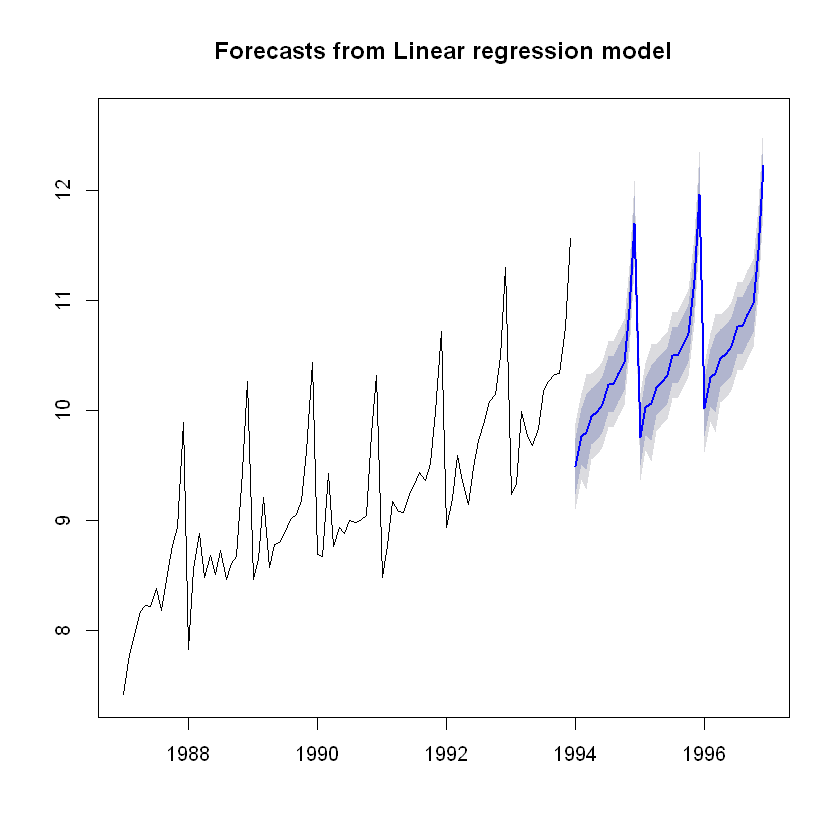

In [43]:
plot(pred)

# 6. The gasoline series consists of weekly data for supplies of US finished motor gasoline product, from 2 February 1991 to 20 January 2017. The units are in “million barrels per day”. Consider only the data to the end of 2004.

## 6.a. Fit a harmonic regression with trend to the data. Experiment with changing the number Fourier terms. Plot the observed gasoline and fitted values and comment on what you see.

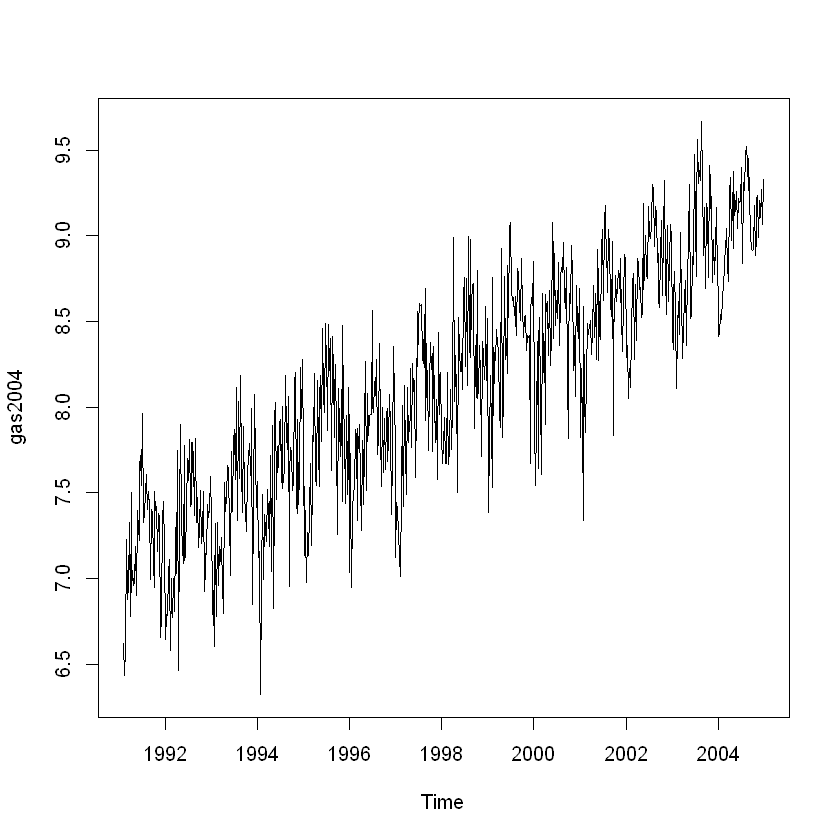

In [44]:
gas2004 <- window(gasoline, end=2005)
plot(gas2004)

In [45]:
fit_gas1 <- tslm(gas2004 ~ trend + fourier(gas2004, K=5))
fit_gas2 <- tslm(gas2004 ~ trend + fourier(gas2004, K=10))
fit_gas3 <- tslm(gas2004 ~ trend + fourier(gas2004, K=25))

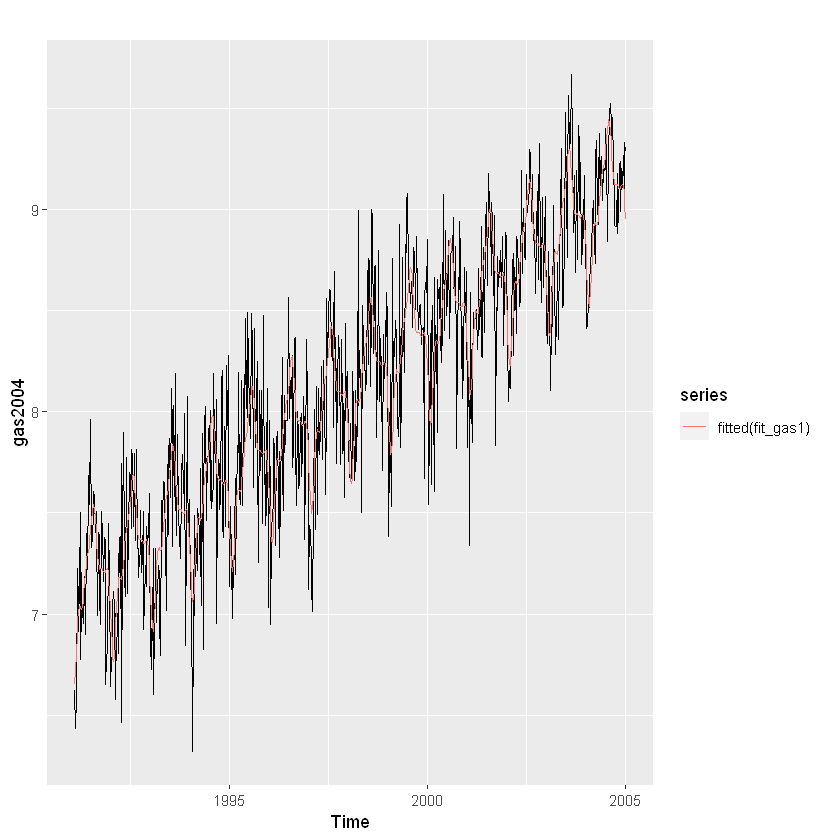

In [46]:
autoplot(gas2004) + autolayer(fitted(fit_gas1))

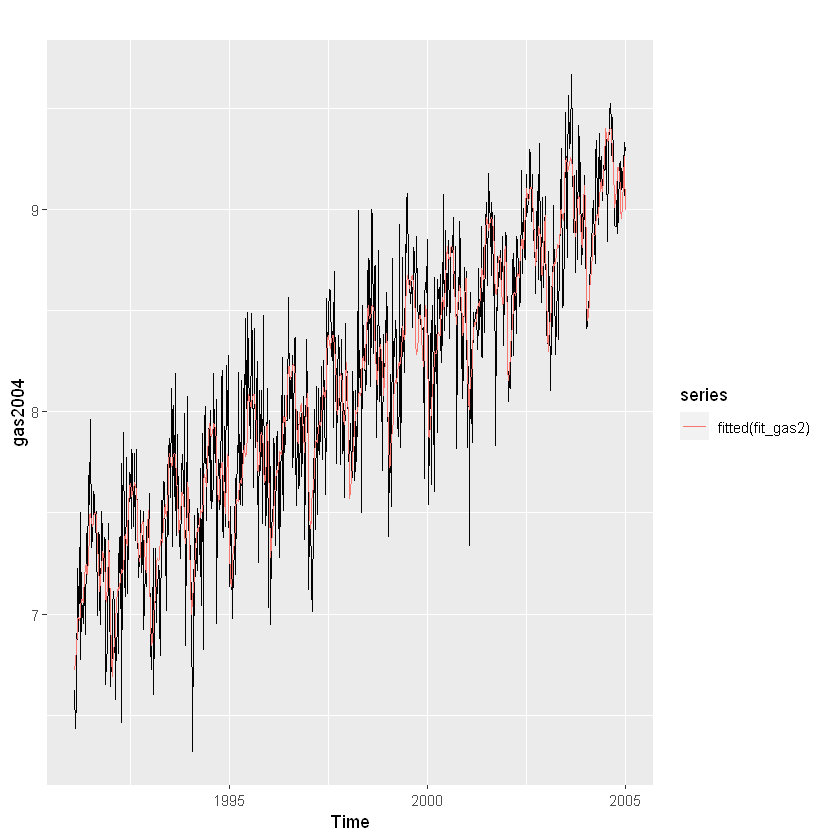

In [47]:
autoplot(gas2004) + autolayer(fitted(fit_gas2))

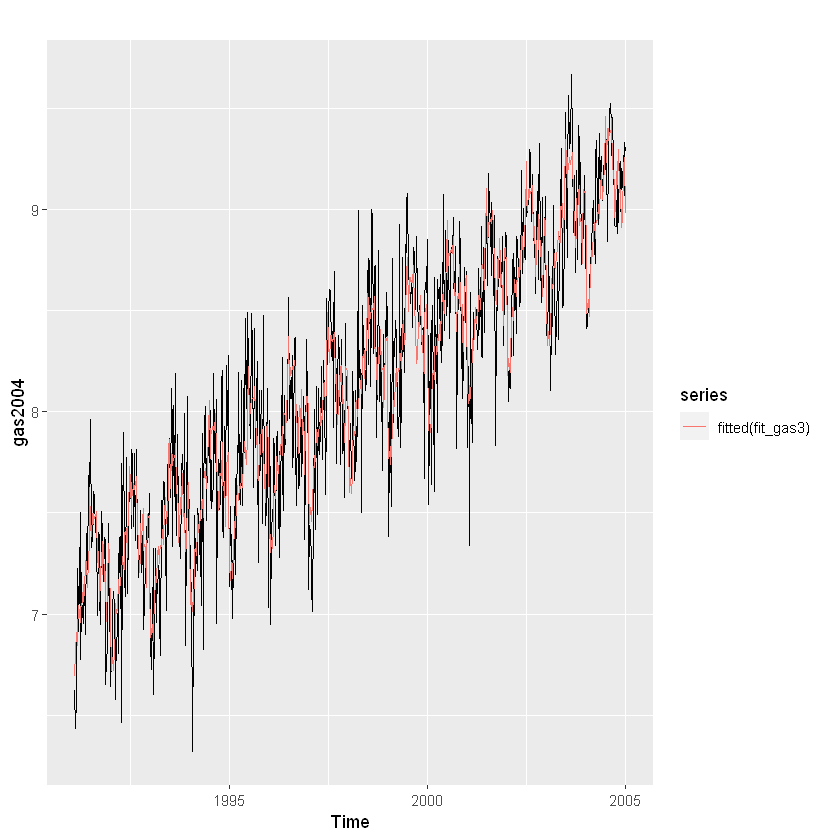

In [48]:
autoplot(gas2004) + autolayer(fitted(fit_gas3))

## 6.b

In [49]:
CV(fit_gas1)

CV           AIC          AICc           BIC         AdjR2 
 7.553646e-02 -1.873234e+03 -1.872723e+03 -1.813596e+03  8.406928e-01

In [50]:
CV(fit_gas2)

CV           AIC          AICc           BIC         AdjR2 
 7.135754e-02 -1.915014e+03 -1.913441e+03 -1.809500e+03  8.516102e-01

In [51]:
CV(fit_gas3)

CV           AIC          AICc           BIC         AdjR2 
 7.382567e-02 -1.893647e+03 -1.885129e+03 -1.650507e+03  8.530376e-01

## 6.c


	Breusch-Godfrey test for serial correlation of order up to 104

data:  Residuals from Linear regression model
LM test = 155.45, df = 104, p-value = 0.0008135


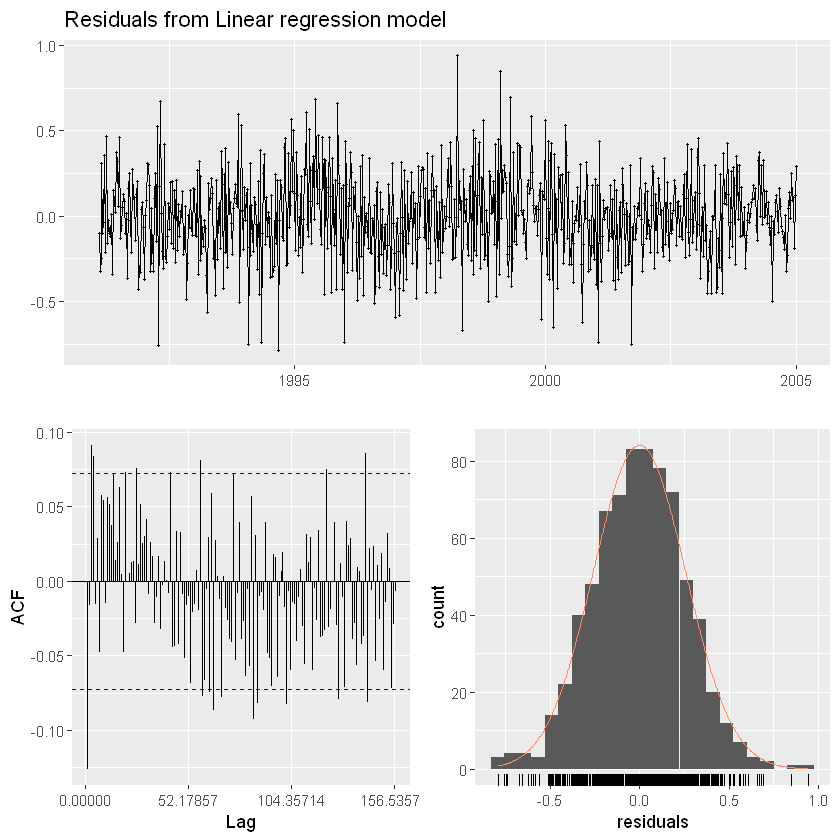

In [52]:
checkresiduals(fit_gas2)

## 6.d

In [53]:
gas_fcst <- forecast(fit_gas2, newdata=data.frame(fourier(gas2004, K=10, h=52)))

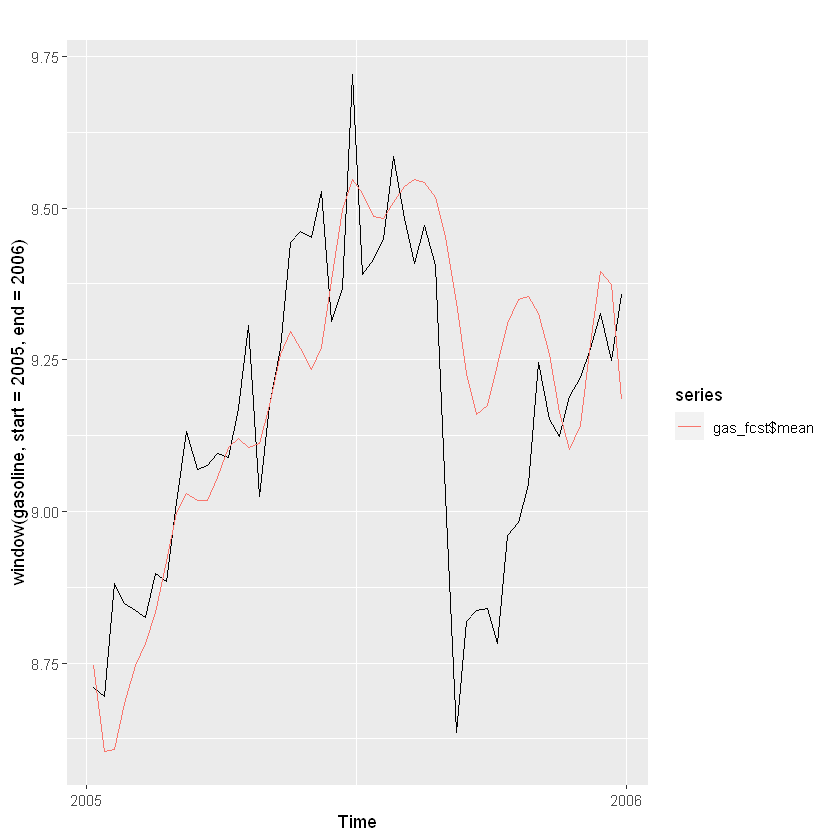

In [54]:
autoplot(window(gasoline, start = 2005, end = 2006)) + autolayer(gas_fcst$mean)

# 7. Data set huron gives the water level of Lake Huron in feet from 1875 to 1972.

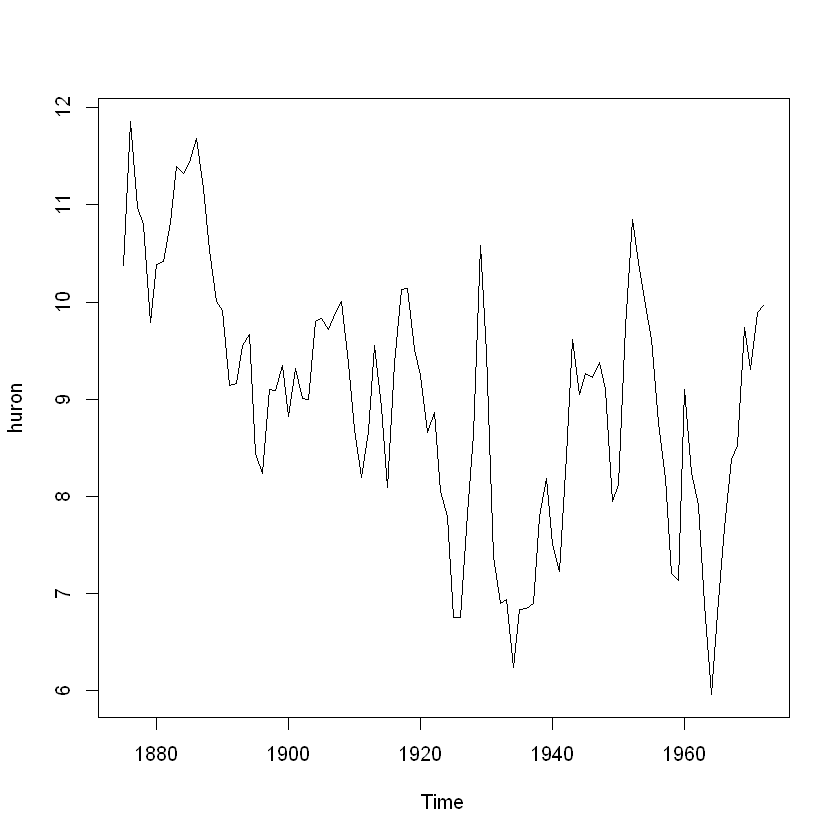

In [55]:
plot(huron)

In [56]:
fit_huron <- tslm(huron ~ trend)

In [57]:
t <- time(huron)

In [58]:
tb <- ts(pmax(0, t - 1915), start = 1875)

In [59]:
t.new <- t[length(t)] + seq(8)
tb.new <- tb[length(tb)] + seq(8)
newdata <- cbind(t=t.new, tb=tb.new) %>%
as.data.frame()

In [60]:
fit_pw <- tslm(huron ~ t + tb)

In [61]:
forecast(fit_huron, h=8)

     Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
1973       7.806127 6.317648 9.294605 5.516501 10.095752
1974       7.781926 6.292536 9.271315 5.490899 10.072952
1975       7.757724 6.267406 9.248043 5.465269 10.050179
1976       7.733523 6.242259 9.224788 5.439613 10.027434
1977       7.709322 6.217094 9.201550 5.413929 10.004715
1978       7.685121 6.191912 9.178331 5.388219  9.982024
1979       7.660920 6.166712 9.155128 5.362481  9.959359
1980       7.636719 6.141494 9.131943 5.336717  9.936721

In [62]:
forecast(fit_pw, newdata = newdata)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1973       8.455119 7.063583 9.846655 6.314483 10.59575
1974       8.454992 7.061518 9.848467 6.311374 10.59861
1975       8.454866 7.059398 9.850333 6.308182 10.60155
1976       8.454739 7.057225 9.852253 6.304906 10.60457
1977       8.454612 7.054998 9.854227 6.301549 10.60768
1978       8.454486 7.052717 9.856254 6.298109 10.61086
1979       8.454359 7.050384 9.858334 6.294587 10.61413
1980       8.454232 7.047997 9.860467 6.290984 10.61748

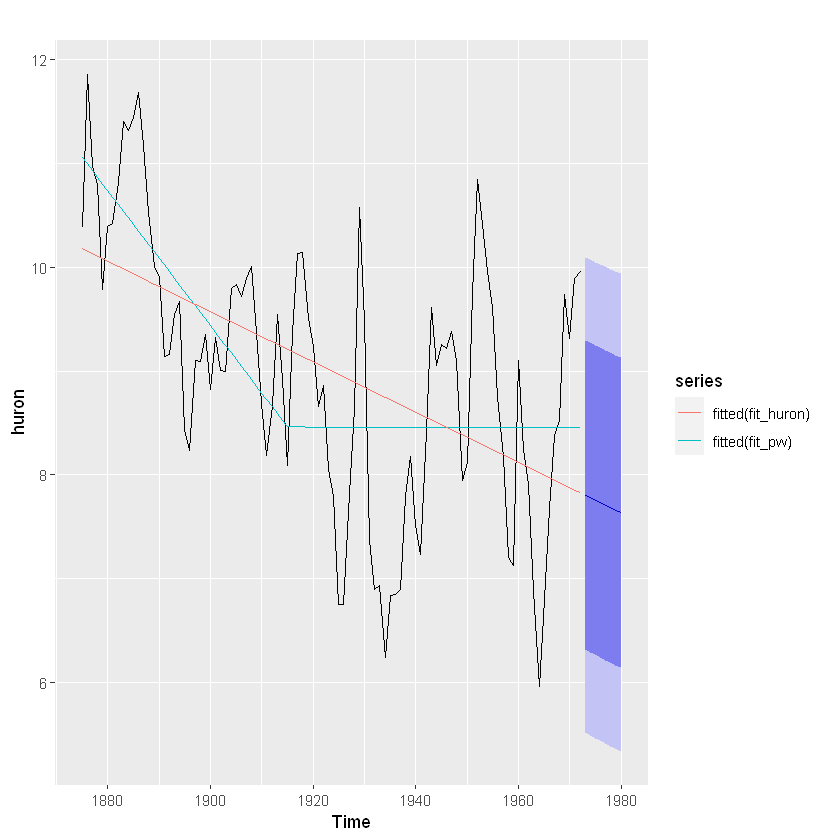

In [64]:
autoplot(huron) + autolayer(fitted(fit_pw)) + autolayer(fitted(fit_huron)) + autolayer(forecast(fit_huron, h=8))

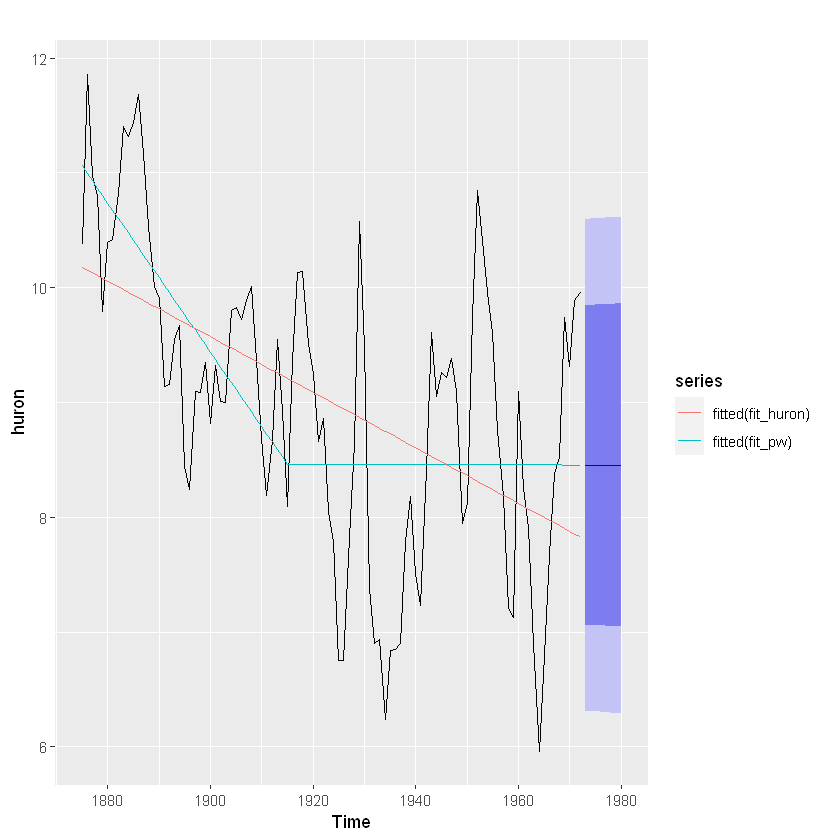

In [65]:
autoplot(huron) + autolayer(fitted(fit_pw)) + autolayer(fitted(fit_huron)) + autolayer(forecast(fit_pw, newdata = newdata))

# 8.

$  \quad\quad 1 \quad t_1 \\
X= \quad ... \\
   \quad\quad1 \quad t_T
$

$
  \quad\quad 1 \quad 1 \\
X' = \\
   \quad\quad t_1 \quad t_T$